## Decision Trees to Classify Data

Install dependencies (scikit-learn iris and decision tree classifier)

In [1]:
from sklearn.datasets import load_iris # data-set
from sklearn.tree import DecisionTreeClassifier # working with classification

### Train the decision tree on the iris data set  
Our instances should train on pedal length and pedal width of the iris sample data.
The DecisionTreeClassifier sets the max tree depth and a random state to start with. 
We then use the classifier to fit the iris data.

In [2]:
iris = load_iris(as_frame = True)

x_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(x_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualize the training
Export the visualization to file

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = ["petal length (cm)", "petal_width (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

### Show the exported visualization
Load from file from created source


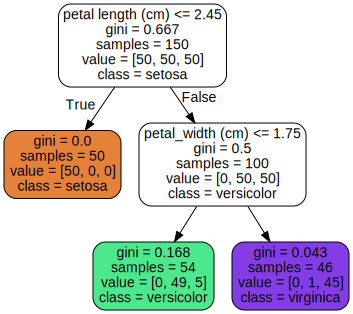

In [4]:
from graphviz import Source

Source.from_file("iris_tree.dot")

### Using the tree result to make a prediction

To classify a flower based on its petals:
1. Start at the root node. If the petals' length are <= 2.45 cm, move to the leaf node. Your flower is a setosa.
2. If it was > 2.45 you move to move down to the right node, node 1. Now we have a condition based on petal width. If they are <= 1.75 cm, then it is likely an Iris Versacolor, otherwise it is probably an Iris Virginica.

### Important notes on the nodes.
- gini: The Gini Impurity. A node is pure (gini 0) if all tThe leaf node depth 1 only belongs to Setosa instances, so it is pure and gini is 0.
- samples: Number of training instances of each class this node applies to.
- value: The number of nodes this training set applies to.
- class: The classification of the flower itself

### Classifying an Iris by petal dimensions, using the previous training


We ask the tree classifier to return the probability that the dimensions we pass in the array [5, 1.5] belong to a class of flower.

In [9]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

**Above**: The returned value is an array of probabilities for each class of flower.  
**index 0**: Returns 0%, it is definitely not an iris setosa (0/54 training instances matched)  
**index 1**: 90% probability that it is an Iris Versicolor (49/54 matched)  
**index 2**: .093 or .9% match, (5/54 training instances matched so low prob.)
  
**Below**   
Visualization of the probability distribution


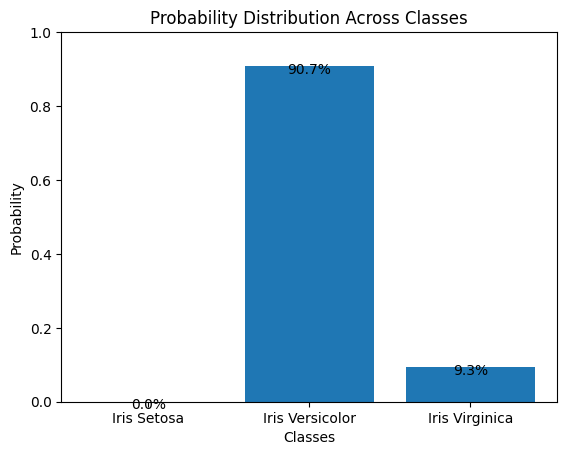

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
probabilities = np.array(tree_clf.predict_proba([[5, 1.5]])[0]).round(3)

# Plot
plt.bar(labels, probabilities)
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Probability Distribution Across Classes')
plt.ylim([0, 1])

# Annotate with percentages
for i, prob in enumerate(probabilities):
    plt.text(i, prob-0.02, f'{prob*100:.1f}%', ha='center')

plt.show()
